In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from growingspheres import counterfactuals as cf



Short illustration of the layer_shape since it is not discussed in the original paper.

In [3]:
from sklearn.svm import SVC

X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = SVC(gamma=1, probability=True)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', accuracy_score(y_test, clf.predict(X_test)))

def plot_classification_contour(X, clf, ax=[0,1], pltax=plt):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    pltax.contourf(xx, yy, Z, alpha=.5, cmap=cm)


 ### Accuracy: 1.0


Text(0.5, 1.0, 'Hyperspheres')

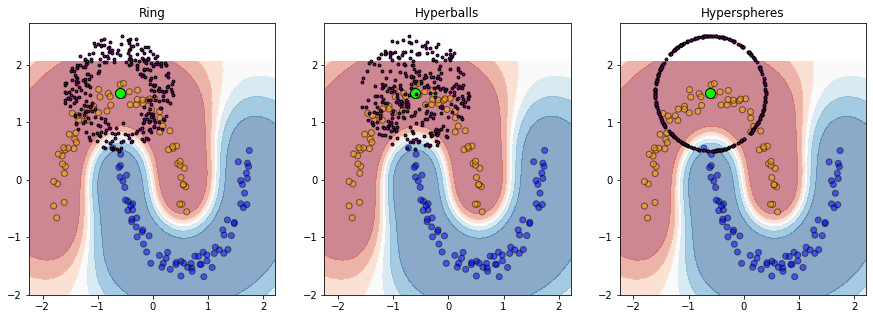

In [18]:
from growingspheres.utils import gs_utils

idx = np.random.randint(X_test.shape[0])
obs = X_test[idx, :].reshape(1, -1)

radius = 0.5
step = 0.5
N = 300

ring = gs_utils.generate_ring(obs, segment=(radius, radius+step), n=N)
ball = gs_utils.generate_ball(obs, r=radius+step, n=N)
sphere = gs_utils.generate_sphere(obs, r=radius+step, n=N)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
plot_classification_contour(X_test, clf, pltax=ax1)
ax1.scatter(X_train[:, 0], X_train[:, 1], marker='o', edgecolors='k', alpha=0.5, color=[['orange', 'blue'][i] for i in y_train])
ax1.scatter(obs[:,0], obs[:,1], marker='o', color='lime', edgecolors='k', s=100)
ax1.scatter(ring[:,0], ring[:,1], marker='o', color='purple', edgecolors='k', s=8)
ax1.set_title("Ring")

plot_classification_contour(X_test, clf, pltax=ax2)
ax2.scatter(X_train[:, 0], X_train[:, 1], marker='o', edgecolors='k', alpha=0.5, color=[['orange', 'blue'][i] for i in y_train])
ax2.scatter(obs[:,0], obs[:,1], marker='o', color='lime', edgecolors='k', s=100)
ax2.scatter(ball[:,0], ball[:,1], marker='o', color='purple', edgecolors='k', s=8)
ax2.set_title("Hyperballs")

plot_classification_contour(X_test, clf, pltax=ax3)
ax3.scatter(X_train[:, 0], X_train[:, 1], marker='o', edgecolors='k', alpha=0.5, color=[['orange', 'blue'][i] for i in y_train])
ax3.scatter(obs[:,0], obs[:,1], marker='o', color='lime', edgecolors='k', s=100)
ax3.scatter(sphere[:,0], sphere[:,1], marker='o', color='purple', edgecolors='k', s=8)
ax3.set_title("Hyperspheres")

